In [ ]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = web.DataReader('TSLA', data_source= 'yahoo', start= '2018-01-01', end = '2021-03-04')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
...,...,...,...,...,...,...
2021-02-26,706.700012,659.510010,700.000000,675.500000,41011300.0,675.500000
2021-03-01,719.000000,685.049988,690.109985,718.429993,27009700.0,718.429993
2021-03-02,721.109985,685.000000,718.280029,686.440002,23617600.0,686.440002


In [ ]:
#get number of ros and colmns
df.shape

(798, 6)

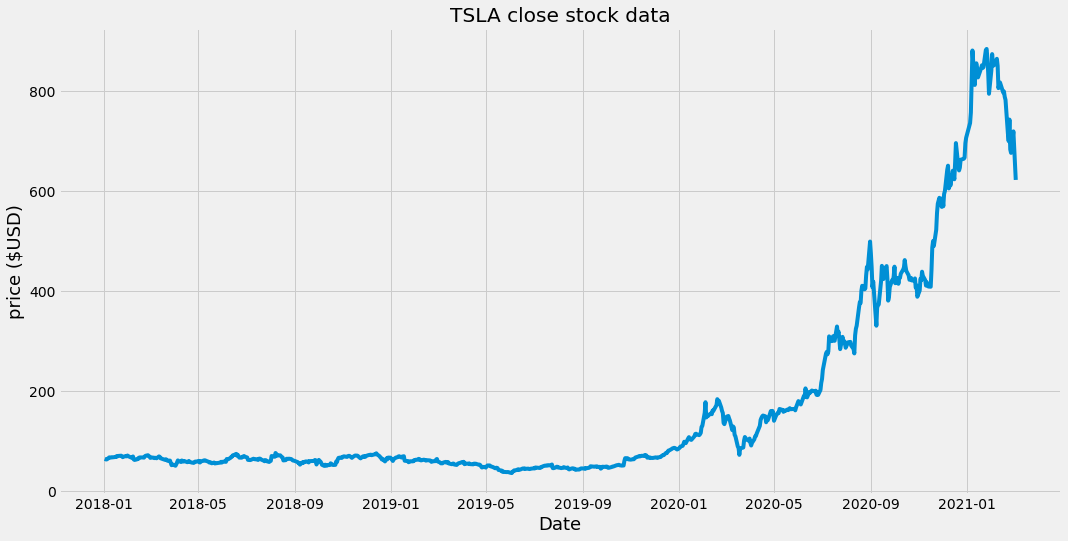

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('TSLA close stock data')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('price ($USD)', fontsize = 18)
plt.show()


In [ ]:
#ceate a new data frame with close data
data = df.filter(['Close'])
#convert to numpy array
dataset = data.values
#get the number of rows to train model on
train_data_len = math.ceil(len(dataset)* .8)

train_data_len

639

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:train_data_len, :]
#split the data into xtrain and ytrain datasets
x_train =[]
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print( )

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.0403755 , 0.04073901, 0.04102934,
       0.03940064, 0.03745326, 0.03868306, 0.04025984, 0.03938411,
       0.04138813, 0.04019374, 0.0388955 , 0.0363887 , 0.03658698,
       0.03919055, 0.0321635 , 0.03102812, 0.03228152, 0.03415336,
       0.03383469, 0.03661059, 0.03694577, 0.03677582, 0.03642883,
       0.03946673, 0.04085468, 0.04212224, 0.04060446, 0.03873263,
       0.0358694 , 0.03685843, 0.03644063, 0.035225  , 0.03619278,
       0.03543744, 0.03498187, 0.03931093, 0.03844465, 0.0348544 ,
       0.03461128, 0.03360809, 0.0317693 , 0.0310588 , 0.03247035,
       0.03071654, 0.02893204, 0.0295552 , 0.02365407, 0.01860271])]
[0.020573686695504467]

[array([0.03341454, 0.03264031, 0.03201951, 0.03248216, 0.03716293,
       0.03652088, 0.03678289, 0.03752643, 0.03711808, 0.03802449,
       0.03970041, 0.03908906, 0.0

In [ ]:
#convert x_train and y_train to nummpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape the data to 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(50))
model.add(Dense(1))

In [ ]:
#compile th model
model.compile(optimizer='adam', loss= 'mean_squared_error')


In [ ]:
#train the model
model.fit(x_train, y_train, batch_size= 1, epochs= 1)

579/579 [==============================] - 16s 23ms/step - loss: 7.8868e-04


In [ ]:
#create testing data set
#create a new array containnig scaled values
test_data = scaled_data[train_data_len - 60: , :]
#create dataset x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the test data to numpy
x_test = np.array(x_test)

In [ ]:
#reshape the test data to 3d
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

3.157028870012775

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


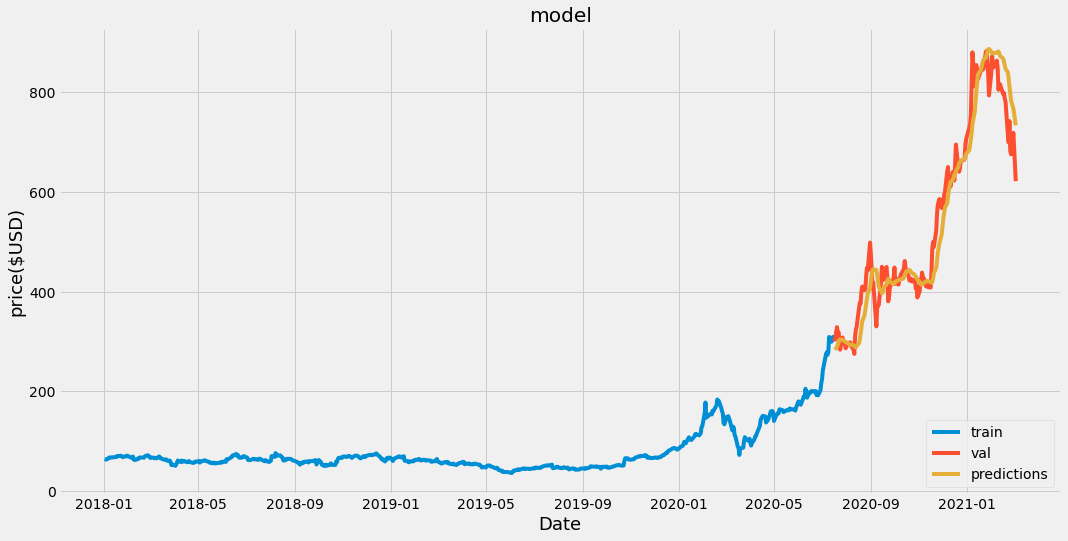

In [ ]:
#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize= 18)
plt.ylabel('price($USD)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show valid and predicted prices
valid

,Close,predictions
Date,,
2020-07-17,300.167999,283.709442
2020-07-20,328.600006,288.153717
2020-07-21,313.671997,293.783997
2020-07-22,318.466003,298.298035
2020-07-23,302.614014,302.221405
...,...,...
2021-02-26,675.500000,782.879272
2021-03-01,718.429993,766.978271
2021-03-02,686.440002,755.911011


In [ ]:
#get the quote
tsla_quote = web.DataReader('TSLA', data_source='yahoo', start='2018-01-01', end = '2021-03-05')
#create new dataframe
new_df = tsla_quote.filter(['Close'])
#get the last 60 values and convert data frame to array
last_60_days = new_df[-60:].values
#scale values to 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test = []
#append the last 60 days
X_test.append(last_60_days_scaled)
#convert X_test data to numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[701.6051]]


In [ ]:
#actual price
tsla_quote_a = web.DataReader('TSLA', data_source='yahoo', start='2021-03-05', end = '2021-03-05')
print(tsla_quote_a['Close'])

Date
2021-03-05    597.950012
Name: Close, dtype: float64
